<a href="https://colab.research.google.com/github/Ductrinh01/AI_Exercises_CNN/blob/main/4_Flowers_detect_(fixed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

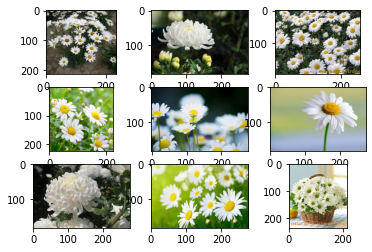

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Data_AI/4_Flowers/CucTrang/'
for i in range(9):
  plt.subplot(330+1+i)
  filename = folder+'CucTrang.'+str(i)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder1 = '/content/drive/MyDrive/Data_AI/4_Flowers/CucTrang/'
folder2 = '/content/drive/MyDrive/Data_AI/4_Flowers/ThuocDuoc/'
folder3 = '/content/drive/MyDrive/Data_AI/4_Flowers/MatTroi/'
folder4 = '/content/drive/MyDrive/Data_AI/4_Flowers/VanTho/'
photos, labels = list(), list()

for i in range(15):
  output = 0
  file = 'CucTrang.'+str(i)+'.jpg'
  photo = load_img(folder1+file,target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

for i in range(15):
  output = 1
  file = 'ThuocDuoc.'+str(i)+'.jpg'
  photo = load_img(folder2+file,target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

for i in range(15):
  output = 2
  file = 'MatTroi.'+str(i)+'.jpg'
  photo = load_img(folder3+file,target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

for i in range(15):
  output = 3
  file = 'VanTho.'+str(i)+'.jpg'
  photo = load_img(folder4+file,target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

#save('4flowers_photos.npy', photos)
#save('4flowers_labels.npy', labels)

(60, 150, 150, 3) (60,)


In [3]:
x_test, y_test = list(), list()

for i in range(15,20):
  output = 0
  file = 'CucTrang.'+str(i)+'.jpg'
  photo = load_img(folder1+file,target_size=(150,150))
  photo = img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)

for i in range(15,20):
  output = 1
  file = 'ThuocDuoc.'+str(i)+'.jpg'
  photo = load_img(folder2+file,target_size=(150,150))
  photo = img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)

for i in range(15,20):
  output = 2
  file = 'MatTroi.'+str(i)+'.jpg'
  photo = load_img(folder3+file,target_size=(150,150))
  photo = img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)

for i in range(15,20):
  output = 3
  file = 'VanTho.'+str(i)+'.jpg'
  photo = load_img(folder4+file,target_size=(150,150))
  photo = img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)

x_test = asarray(x_test)
y_test = asarray(y_test)
print(x_test.shape,y_test.shape)

(20, 150, 150, 3) (20,)


In [ ]:
# khong chay cai nay
for file in listdir(folder1):
  if file.startswith('CucTrang'):
    output = 0
    photo = load_img(folder1+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder2):
  if file.startswith('ThuocDuoc'):
    output = 1
    photo = load_img(folder2+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder3):
  if file.startswith('MatTroi'):
    output = 2
    photo = load_img(folder3+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder4):
  if file.startswith('VanTho'):
    output = 3
    photo = load_img(folder4+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

In [4]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [5]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [6]:
photos = photos.reshape(60,150,150,3)
x_test = x_test.reshape(20,150,150,3)
photos = photos.astype('float32')
x_test = x_test.astype('float32')

photos/=255 # Chia từ ảnh màu thành ảnh xám
x_test/=255

In [7]:
from keras.utils                  import np_utils
labels = np_utils.to_categorical(labels,4)
y_test = np_utils.to_categorical(y_test,4)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(27,48),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3),strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(27,48), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(512, activation='relu', name='layer2'))
model.add(Dense(512, activation='relu', name='layer3'))
model.add(Dense(4, activation='softmax', name='layer4'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 layer1 (Dense)              (None, 512)               2

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(photos,labels,epochs = 20)
model.save('4_Flowers.h5')

Epoch 1/20
2/2 [==============================] - 2s 742ms/step - loss: 1.3911 - accuracy: 0.2333
Epoch 2/20
2/2 [==============================] - 2s 721ms/step - loss: 1.5041 - accuracy: 0.2833
Epoch 3/20
2/2 [==============================] - 2s 709ms/step - loss: 1.3419 - accuracy: 0.2667
Epoch 4/20
2/2 [==============================] - 2s 717ms/step - loss: 1.2186 - accuracy: 0.4500
Epoch 5/20
2/2 [==============================] - 2s 733ms/step - loss: 0.9296 - accuracy: 0.4167
Epoch 6/20
2/2 [==============================] - 1s 698ms/step - loss: 0.8411 - accuracy: 0.6667
Epoch 7/20
2/2 [==============================] - 2s 699ms/step - loss: 0.7407 - accuracy: 0.6500
Epoch 8/20
2/2 [==============================] - 1s 696ms/step - loss: 0.5216 - accuracy: 0.8167
Epoch 9/20
2/2 [==============================] - 2s 694ms/step - loss: 0.5536 - accuracy: 0.7167
Epoch 10/20
2/2 [==============================] - 2s 698ms/step - loss: 0.4178 - accuracy: 0.8833
Epoch 11/20
2/2 [==

In [10]:
print(x_test.shape,y_test.shape)

(20, 150, 150, 3) (20, 4)


In [13]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.10543342679738998
Test accuracy 0.949999988079071


In [14]:
from keras.models import load_model
models=load_model('4_Flowers.h5')

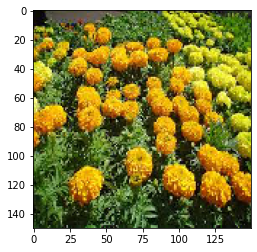

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img1 = load_img('Cuctest.jpg', target_size=(150,150))
img2 = load_img('ThuocDuoctest.jpg', target_size=(150,150))
img3 = load_img('MatTroitest.jpg', target_size=(150,150))
img4 = load_img('VanThotest.jpg', target_size=(150,150))

plt.imshow(img4)

In [25]:
import numpy as np
classes = ['Cuc','ThuocDuoc','MatTroi','VanTho']
imgRe = img_to_array(img4)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
#imgre /=255

y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[0]]

[[0. 0. 0. 1.]]


'VanTho'